In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('default')

# --- MUDANÇA AQUI ---
# Passando uma lista com uma única cor, todos os gráficos usarão ela por padrão.
# Você pode usar 'blue', 'navy', 'skyblue' ou um código Hexadecimal.
sns.set_palette(['#1f77b4'])  # Este é o "azul padrão" bonito do Python
# --------------------

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_pickle('data/df_cleaned.pkl')

In [4]:
# Visão geral do Dataset
print(f"Total de jogadores: {df.shape[0]:,}")
print(f"Total de atributos: {df.shape[1]:,}")

Total de jogadores: 16,228
Total de atributos: 56


In [5]:
# Entender Features Principais
main_attributes = [
    'ovr', 'pac', 'sho',
    'pas', 'dri', 'def',
    'phy', 'age',
    'heightcm', 'weightkg',
    'weak_foot', 'skill_moves'
]

df[main_attributes].describe()

,ovr,pac,sho,pas,dri,def,phy,age,heightcm,weightkg,weak_foot,skill_moves
count,16228.000000,16228.000000,16228.000000,16228.000000,16228.000000,16228.000000,16228.00000,16228.000000,16228.000000,16228.000000,16228.000000,16228.000000
mean,66.241126,68.151836,54.346069,58.602662,63.659354,50.563902,65.21124,25.854449,182.104018,75.283276,2.943493,2.375770
std,6.823219,10.435775,13.717709,9.615111,9.126835,16.533785,9.46065,4.690417,6.895519,6.932973,0.669765,0.774531
min,47.000000,30.000000,21.000000,25.000000,29.000000,15.000000,32.00000,17.000000,155.000000,47.000000,1.000000,1.000000
25%,62.000000,62.000000,45.000000,52.000000,58.000000,36.000000,59.00000,22.000000,177.000000,70.000000,3.000000,2.000000
50%,66.000000,69.000000,57.000000,59.000000,64.000000,55.000000,66.00000,25.000000,182.000000,75.000000,3.000000,2.000000
75%,70.000000,75.000000,64.000000,65.000000,70.000000,64.000000,72.00000,29.000000,187.000000,80.000000,3.000000,3.000000
max,91.000000,97.000000,92.000000,92.000000,93.000000,90.000000,91.00000,44.000000,210.000000,105.000000,5.000000,5.000000


In [6]:
df.head()

,rank,name,ovr,pac,sho,pas,dri,def,phy,acceleration,sprint_speed,positioning,finishing,shot_power,long_shots,volleys,penalties,vision,crossing,free_kick_accuracy,short_passing,long_passing,curve,dribbling,agility,balance,reactions,ball_control,composure,interceptions,heading_accuracy,def_awareness,standing_tackle,sliding_tackle,jumping,stamina,strength,aggression,position,weak_foot,skill_moves,preferred_foot,heightcm,weightkg,alternative_positions,age,nation,league,team,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,sector,versatility
0,1,Mohamed Salah,91,89,88,86,90,45,76,88,89,93,94,83,78,83,88,86,89,69,88,81,88,90,86,91,94,90,93,55,59,38,43,41,79,88,75,63,RM,3,4,0,175,72,['RW'],33,Egypt,Premier League,Liverpool,0.0,0.0,0.0,0.0,0.0,midfielder,1
1,3,Kylian Mbappé,91,97,90,81,92,37,76,97,97,91,92,91,86,87,82,78,83,69,87,74,80,92,93,82,91,93,88,38,78,26,34,32,90,83,77,61,ST,4,5,1,182,75,"['LW', 'LM']",26,France,LALIGA EA SPORTS,Real Madrid,0.0,0.0,0.0,0.0,0.0,forward,2
2,5,Ousmane Dembélé,90,91,88,83,93,50,69,93,89,95,90,91,85,79,80,80,84,68,89,78,85,94,94,81,91,94,88,45,74,49,49,39,84,76,69,58,ST,5,5,0,178,67,"['RW', 'CAM']",28,France,Ligue 1 McDonald's,Paris SG,0.0,0.0,0.0,0.0,0.0,forward,2
3,6,Rodri,90,65,80,86,84,86,85,65,65,76,74,92,89,71,62,76,84,64,93,91,86,84,66,67,93,90,93,84,81,88,87,82,83,91,83,85,CDM,4,3,1,190,82,['CM'],29,Spain,Premier League,Manchester City,0.0,0.0,0.0,0.0,0.0,midfielder,1
4,8,Virgil van Dijk,90,73,60,72,72,90,87,66,78,47,52,81,64,45,62,53,70,70,80,83,60,70,54,50,90,77,90,91,88,91,91,87,89,75,93,85,CB,3,2,1,193,92,NaN,34,Holland,Premier League,Liverpool,0.0,0.0,0.0,0.0,0.0,defense,0


In [7]:
df.columns

Index(['rank', 'name', 'ovr', 'pac', 'sho', 'pas', 'dri', 'def', 'phy',
       'acceleration', 'sprint_speed', 'positioning', 'finishing',
       'shot_power', 'long_shots', 'volleys', 'penalties', 'vision',
       'crossing', 'free_kick_accuracy', 'short_passing', 'long_passing',
       'curve', 'dribbling', 'agility', 'balance', 'reactions', 'ball_control',
       'composure', 'interceptions', 'heading_accuracy', 'def_awareness',
       'standing_tackle', 'sliding_tackle', 'jumping', 'stamina', 'strength',
       'aggression', 'position', 'weak_foot', 'skill_moves', 'preferred_foot',
       'heightcm', 'weightkg', 'alternative_positions', 'age', 'nation',
       'league', 'team', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes', 'sector', 'versatility'],
      dtype='object')

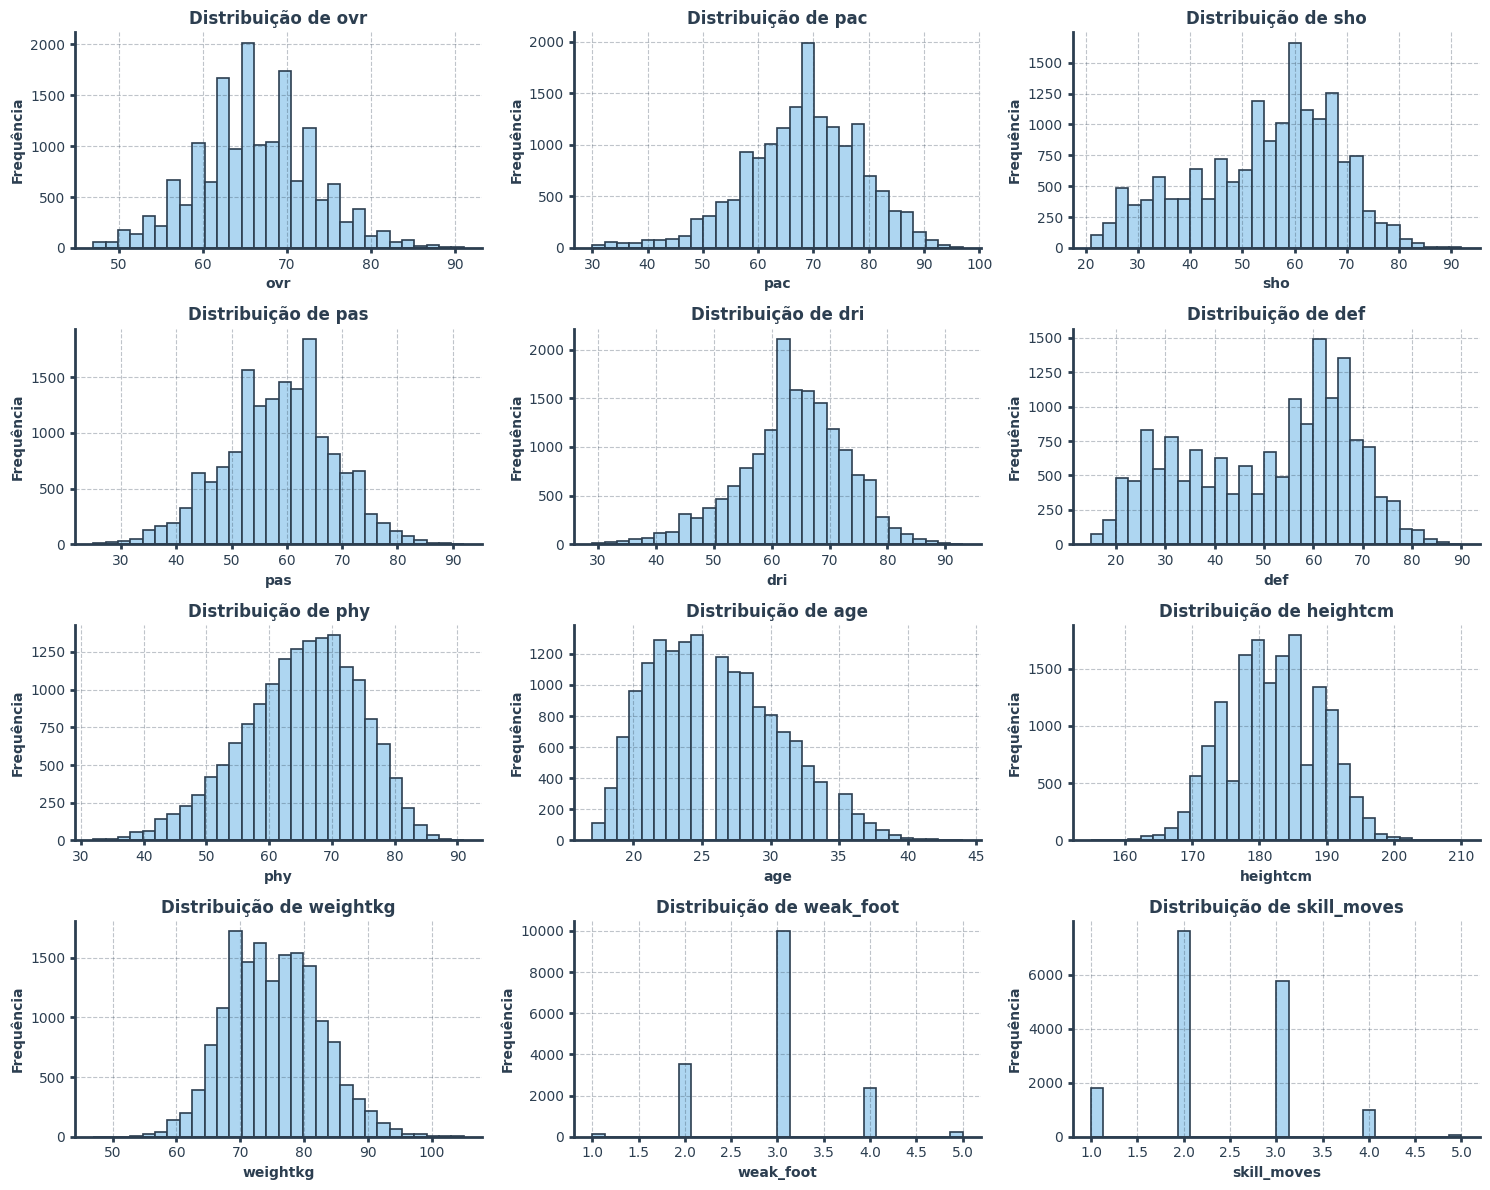

In [33]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, attr in enumerate(main_attributes):
    axes[idx].hist(df[attr], bins=30, 
                   color='#AED6F1', 
                   edgecolor='#2c3e50', 
                   linewidth=1.2)
    
    axes[idx].set_title(f'Distribuição de {attr}', fontsize=12, fontweight='bold', color='#2c3e50')
    axes[idx].set_xlabel(attr, fontsize=10, fontweight='bold', color='#2c3e50')
    axes[idx].set_ylabel('Frequência', fontsize=10, fontweight='bold', color='#2c3e50')
    
    axes[idx].spines['bottom'].set_linewidth(2)
    axes[idx].spines['bottom'].set_color('#2c3e50')
    axes[idx].spines['left'].set_linewidth(2)
    axes[idx].spines['left'].set_color('#2c3e50')
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['right'].set_visible(False)
    
    axes[idx].tick_params(width=2, colors='#2c3e50')
    axes[idx].grid(True, linestyle='--', alpha=0.3, color='#2c3e50')

for i in range(len(main_attributes), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

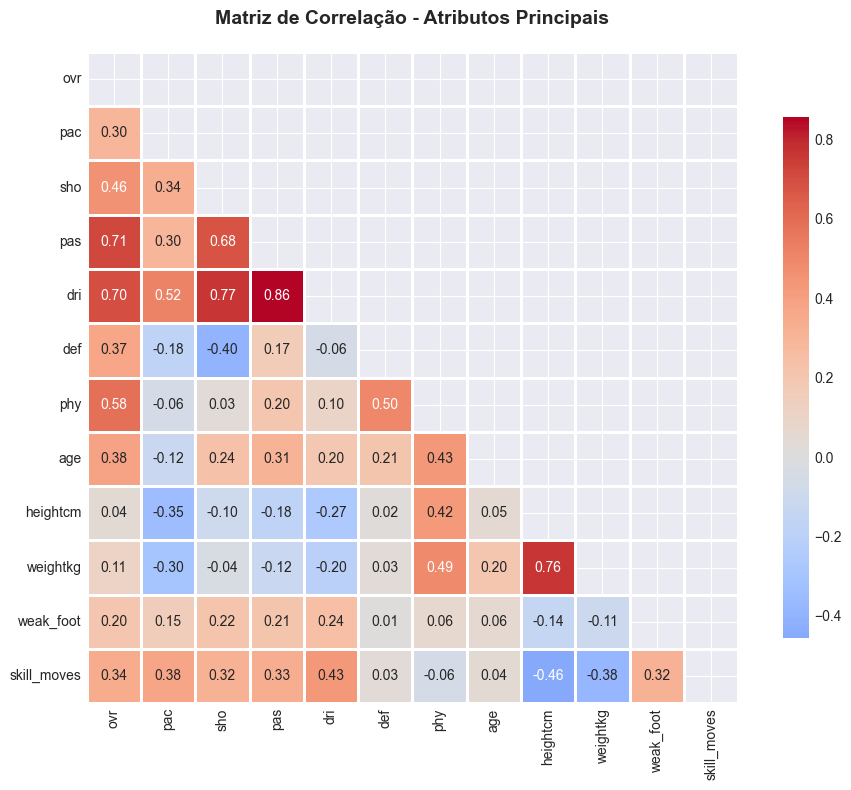

In [9]:
# Matriz de correlação dos atributos principais
corr_matrix = df[main_attributes].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Atributos Principais', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


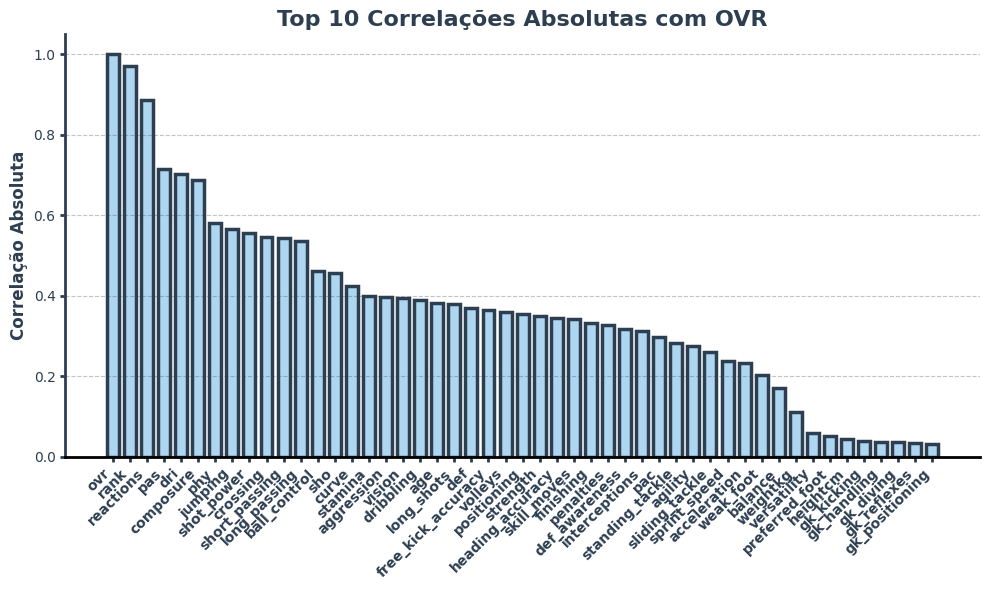

In [32]:
all_numeric = df.select_dtypes(include=[np.number]).columns
corr_with_ovr = (
    df[all_numeric]
    .corrwith(df['ovr'])
    .abs()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))

plt.bar(corr_with_ovr.index, corr_with_ovr.values, 
        color='#AED6F1',
        edgecolor='#2c3e50',
        linewidth=2.5,
        width=0.7)

plt.title("Top 10 Correlações Absolutas com OVR", fontsize=16, fontweight='bold', color='#2c3e50')
plt.ylabel("Correlação Absoluta", fontsize=12, fontweight='bold', color='#2c3e50')

ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color='#2c3e50'
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_color('#2c3e50')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width=2, colors='#2c3e50')
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold', color='#2c3e50')
plt.grid(axis='y', linestyle='--', alpha=0.3, color='#2c3e50')

plt.tight_layout()
plt.show()

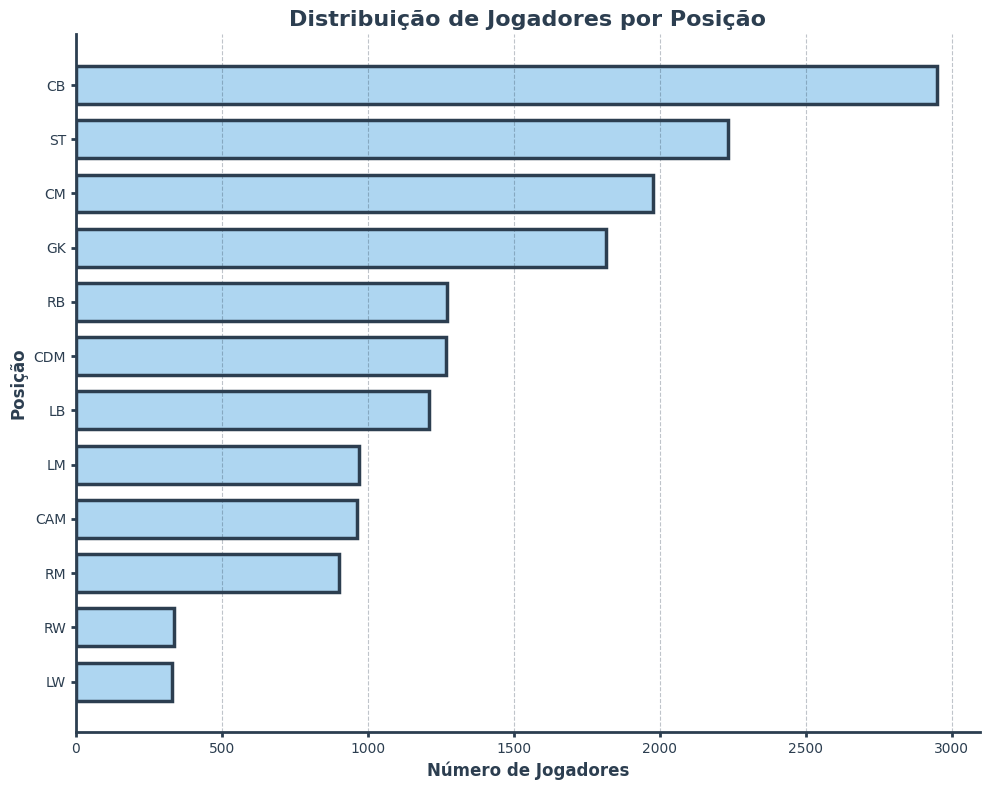

In [29]:
position_counts = df['position'].value_counts()

plt.figure(figsize=(10, 8))

plt.barh(position_counts.index, position_counts.values, 
         color='#AED6F1',
         edgecolor='#2c3e50', 
         linewidth=2.5, 
         height=0.7)

plt.title('Distribuição de Jogadores por Posição', fontsize=16, fontweight='bold', color='#2c3e50')
plt.xlabel('Número de Jogadores', fontsize=12, fontweight='bold', color='#2c3e50')
plt.ylabel('Posição', fontsize=12, fontweight='bold', color='#2c3e50')

plt.gca().invert_yaxis()

ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('#2c3e50')
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_color('#2c3e50')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width=2, colors='#2c3e50')
plt.grid(axis='x', linestyle='--', alpha=0.3, color='#2c3e50')

plt.tight_layout()
plt.show()

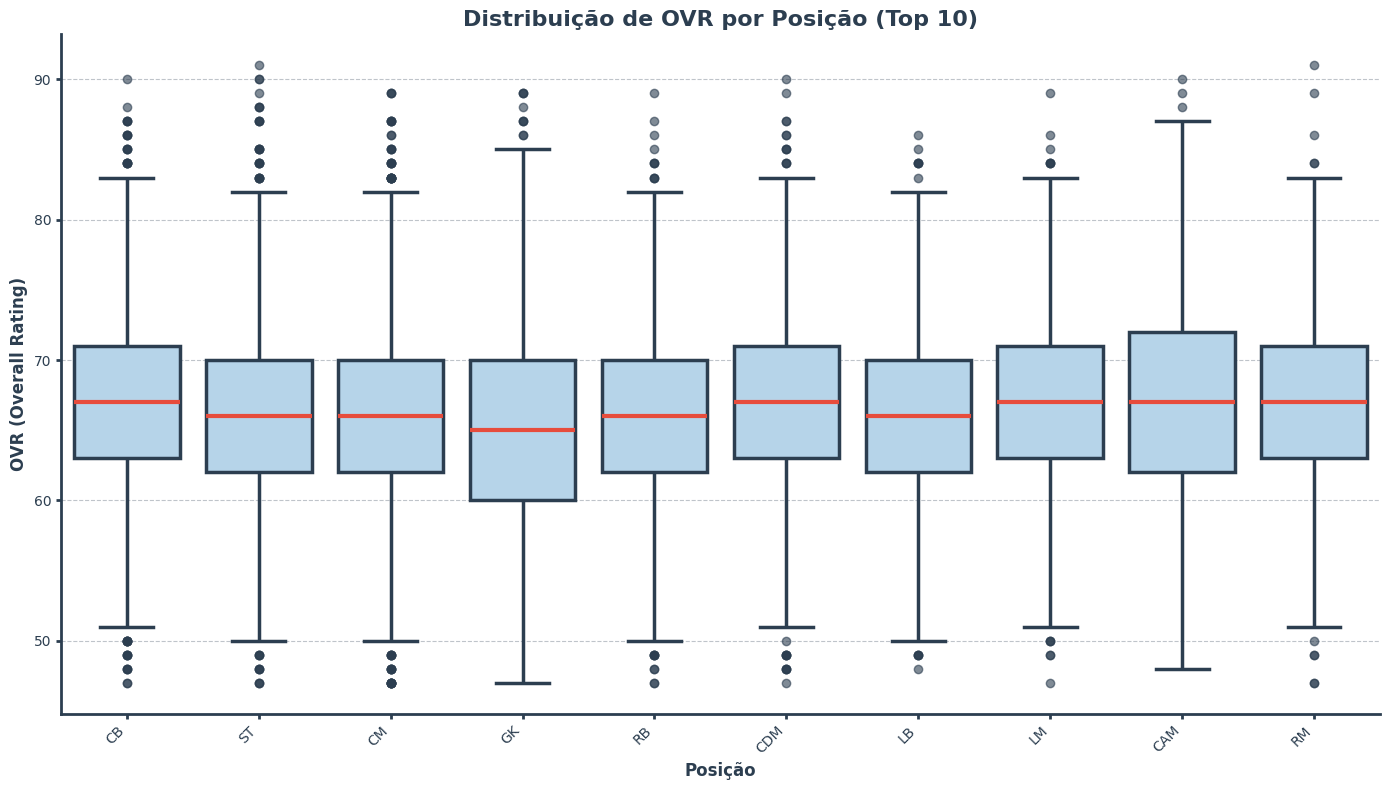

In [28]:
top_positions = position_counts.head(10).index
df_top_pos = df[df['position'].isin(top_positions)]

plt.figure(figsize=(14, 8))

sns.boxplot(data=df_top_pos, x='position', y='ovr', order=top_positions,
            color='#AED6F1', 
            linewidth=2.5,
            flierprops=dict(marker='o', markerfacecolor='#2c3e50', markeredgecolor='#2c3e50', alpha=0.6),
            boxprops=dict(edgecolor='#2c3e50'),
            whiskerprops=dict(color='#2c3e50'),
            capprops=dict(color='#2c3e50'),
            medianprops=dict(color='#E74C3C', linewidth=3))

plt.title('Distribuição de OVR por Posição (Top 10)', fontsize=16, fontweight='bold', color='#2c3e50')
plt.xlabel('Posição', fontsize=12, fontweight='bold', color='#2c3e50')
plt.ylabel('OVR (Overall Rating)', fontsize=12, fontweight='bold', color='#2c3e50')

ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('#2c3e50')
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_color('#2c3e50')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width=2, colors='#2c3e50')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3, color='#2c3e50')

plt.tight_layout()
plt.show()

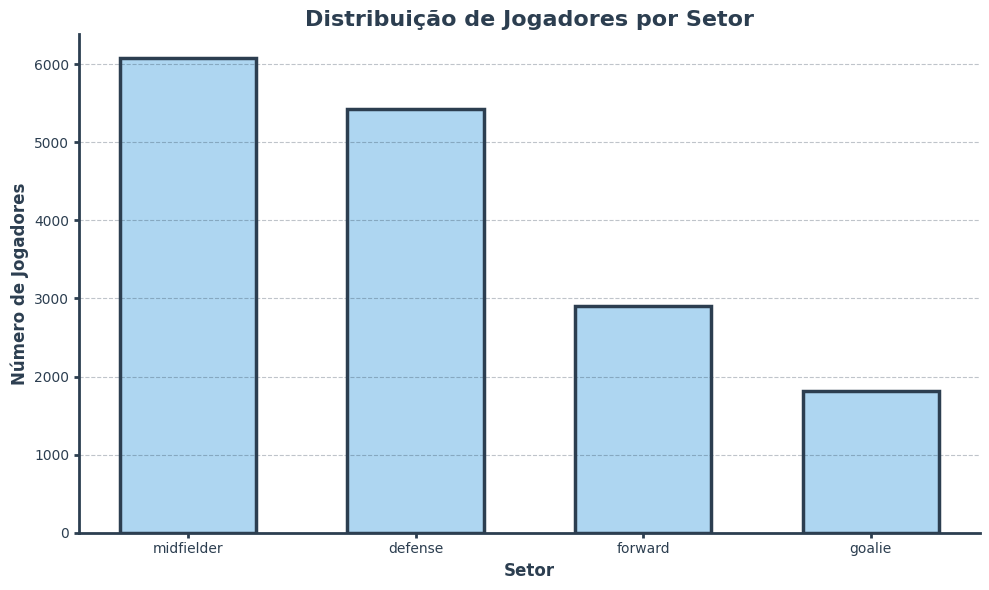

In [26]:
sector_counts = df['sector'].value_counts()

plt.figure(figsize=(10, 6))

bars = plt.bar(sector_counts.index, sector_counts.values, 
               color='#AED6F1',
               edgecolor='#2c3e50',
               linewidth=2.5,
               width=0.6)            


plt.title('Distribuição de Jogadores por Setor', fontsize=16, fontweight='bold', color='#2c3e50')
plt.xlabel('Setor', fontsize=12, fontweight='bold', color='#2c3e50')
plt.ylabel('Número de Jogadores', fontsize=12, fontweight='bold', color='#2c3e50')

ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('#2c3e50')
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_color('#2c3e50')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width=2, colors='#2c3e50') 
plt.grid(axis='y', linestyle='--', alpha=0.3, color='#2c3e50') 

plt.tight_layout()
plt.show()

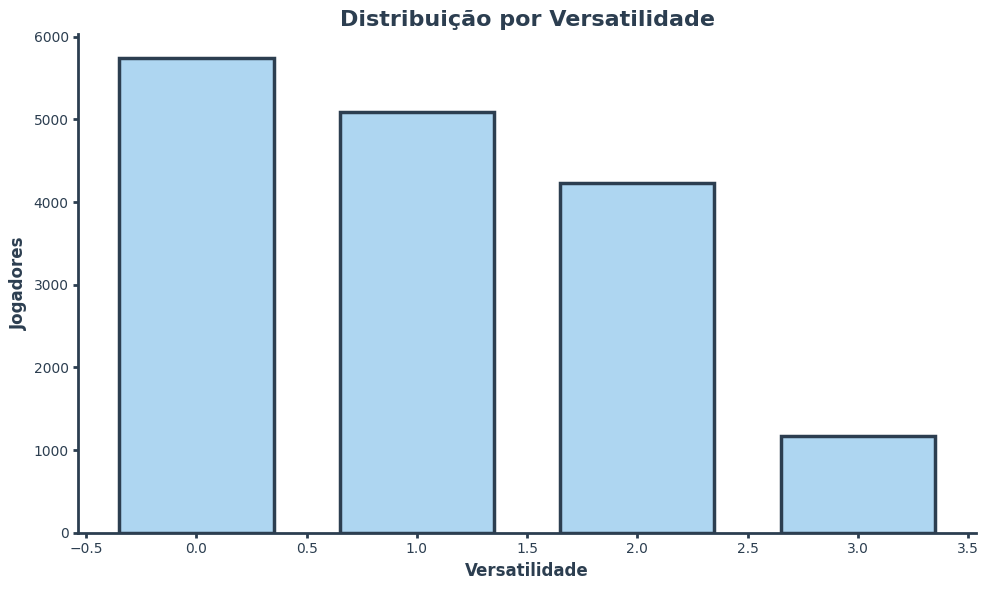

In [25]:
import matplotlib.pyplot as plt

# Supondo que sector_counts já exista
# sector_counts = df['versatility'].value_counts().sort_index() 

plt.figure(figsize=(10, 6))

bars = plt.bar(sector_counts.index, sector_counts.values, 
               color='#AED6F1',      
               edgecolor='#2c3e50',  
               linewidth=2.5,
               width=0.7
)

plt.title('Distribuição por Versatilidade', fontsize=16, fontweight='bold', color='#2c3e50')
plt.xlabel('Versatilidade', fontsize=12, fontweight='bold', color='#2c3e50')
plt.ylabel('Jogadores', fontsize=12, fontweight='bold', color='#2c3e50')

# Ajustes dos eixos (mantendo seu estilo grosso)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('#2c3e50') # Garante que a linha de baixo seja da mesma cor
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_color('#2c3e50')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Colorindo os "ticks" (tracinhos da régua) também
ax.tick_params(width=2, colors='#2c3e50')

plt.tight_layout()
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# Regressão Linear Simples
numeric_df = df.select_dtypes(include=[np.number])

X = numeric_df.drop(['ovr', 'rank'], axis=1, errors='ignore')
y = numeric_df['ovr']

X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")

R² (Coeficiente de Determinação): 0.9144
MSE (Erro Quadrático Médio): 3.9711


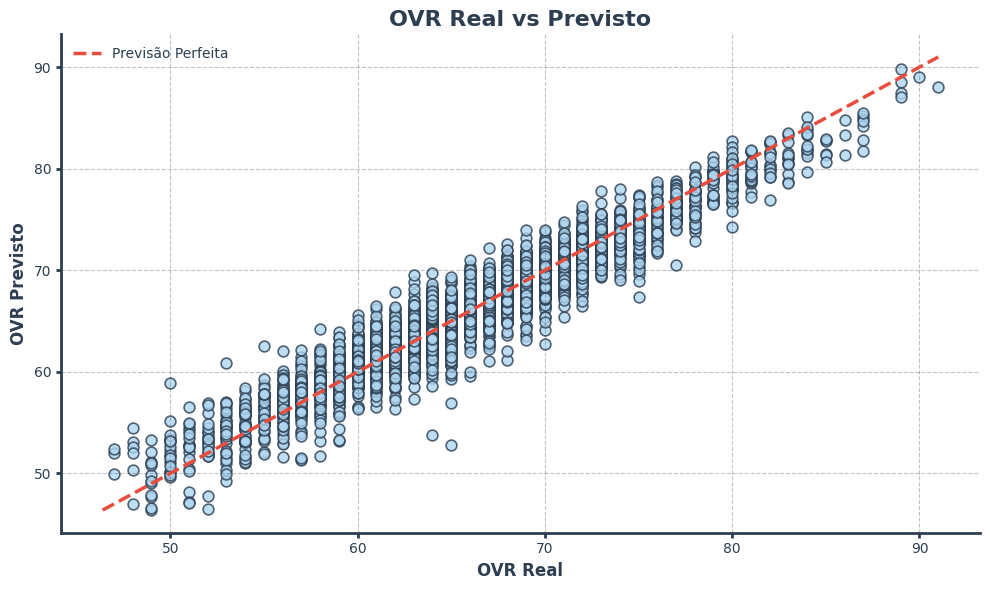

In [40]:

plt.figure(figsize=(10, 6))

plt.scatter(
    y_test, y_pred, 
    color='#AED6F1', 
    edgecolor='#2c3e50', 
    s=60,
    alpha=0.8, 
    linewidth=1.2
) 

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 
         color='#E74C3C', linestyle='--', linewidth=2.5, label='Previsão Perfeita')


plt.title(f'OVR Real vs Previsto', fontsize=16, fontweight='bold', color='#2c3e50')
plt.xlabel('OVR Real', fontsize=12, fontweight='bold', color='#2c3e50')
plt.ylabel('OVR Previsto', fontsize=12, fontweight='bold', color='#2c3e50')
plt.legend(frameon=False, labelcolor='#2c3e50')


ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('#2c3e50')
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_color('#2c3e50')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2, colors='#2c3e50')

plt.grid(True, linestyle='--', alpha=0.3, color='#2c3e50')
plt.tight_layout()
plt.show()